# Settings

## Libraries

In [1]:
# Set working directoy as the project folder
import os

if os.getcwd().endswith('notebooks'):
    os.chdir('..')

In [2]:
import sidetable
import pandas as pd

import nltk
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Library settings

In [3]:
# see rc Params on https://matplotlib.org/stable/tutorials/introductory/customizing.html
# or just take a look at plt.rcParams
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.labelpad': 20,
        'axes.titlepad': 30
    }
)

## Functions

In [4]:
def show_data_dimensions(df):
    nrows, ncols = df.shape
    print(f'Data has {nrows:,} observations and {ncols:,} features.')

## Load dataset

In [5]:
# Load dataset
df_train = pd.read_csv('data/train.csv', index_col='id')
df_test = pd.read_csv('data/test.csv', index_col='id')

# EDA

### Data dimensions

In [6]:
# Dimensions for train data
show_data_dimensions(df_train)
display(df_train.head())

Data has 7,613 observations and 4 features.


,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Dimensions for test data
show_data_dimensions(df_test)
display(df_test.head())

Data has 3,263 observations and 3 features.


,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Data types

In [8]:
# Data types
print('-- Training set -- ')
print(df_train.info())

print('\n-- Test set -- ')
print(df_train.info())

-- Training set -- 
<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB
None

-- Test set -- 
<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB
None


### Missing values

In [9]:
# Train data
df_train.stb.missing()

,missing,total,percent
location,2533,7613,33.272035
keyword,61,7613,0.801261
text,0,7613,0.000000
target,0,7613,0.000000


In [10]:
# Test data
df_test.stb.missing()

,missing,total,percent
location,1105,3263,33.864542
keyword,26,3263,0.796813
text,0,3263,0.000000


## Cardinality

In [11]:
df_train[['keyword','location']].describe()

,keyword,location
count,7552,5080
unique,221,3341
top,fatalities,USA
freq,45,104


In [12]:
df_train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [13]:
# Random sample of locations
df_train.location.sample(50, replace=False, random_state=2024).unique()

array([nan, 'Berlin - Germany', 'canada', 'Global', 'Toronto, ON, Canada',
       'Tring, UK', 'LA - everywhere', 'New York, NY', '???',
       'Calgary, Alberta', 'SoCal', 'Miami?Gainesville', 'Austin, Texas',
       'Virginia', 'North', 'Hertfordshire ', 'Indianapolis, IN',
       'Manchester, England', 'Catskills', '#iminchina', 'Heathrow',
       'London', 'dubai ',
       'SF Bay Area, California / Greater Phoenix, AZ', 'Canada',
       'Tamworth', 'Manila', 'Tokyo', 'Hartford, Connecticut',
       'www.facebook.com/stuntfm'], dtype=object)

## Proportion target

In [14]:
# Target proportions
df_train.stb.freq(['target'])

,target,count,percent,cumulative_count,cumulative_percent
0,0,4342,57.034021,4342,57.034021
1,1,3271,42.965979,7613,100.000000


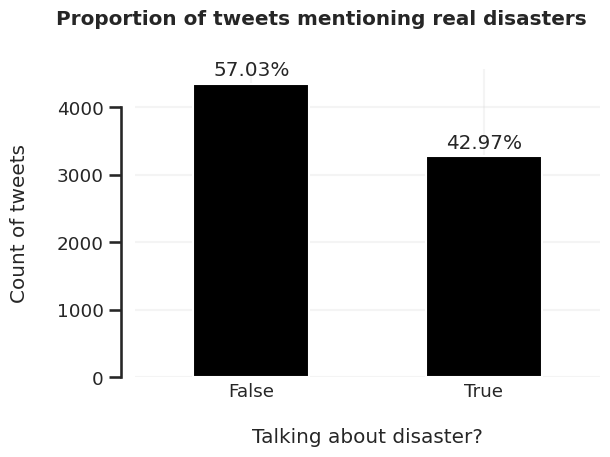

In [15]:
# Calculate absolute and relative frequencies of the 'target' column
target_abs_freq = df_train['target'].astype(bool).astype(str).value_counts(normalize=False)  # Absolute counts
target_rel_freq = df_train['target'].astype(bool).astype(str).value_counts(normalize=True)   # Relative proportions

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the absolute frequencies as a bar plot
target_abs_freq.plot.bar(color='black', ax=ax)

# Set axis labels and remove x-axis tick rotation
plt.xlabel('Talking about disaster?')
plt.ylabel('Count of tweets')
plt.xticks(rotation=0)

# Loop through the bars to add percentage annotations based on relative frequency
for p, l in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()  # Get the height (count) of the bar
    pct_text = target_rel_freq[l.get_text()]  # Get the relative frequency for the category
    ax.annotate(
        f'{pct_text:.2%}',  # Format the percentage text
        xy=(p.get_x() + p.get_width() / 2, height),  # Set annotation position at the center of the bar
        xytext=(0, 3),  # Offset the text slightly above the bar
        textcoords="offset points", ha='center', va='bottom'  # Align the text in the center
    )

# Set the plot title with specific positioning and styling
plt.title('Proportion of tweets mentioning real disasters', weight='bold', size='medium', y=1.01, x=0.4)

# Remove x-axis ticks for a cleaner look
ax.tick_params(axis='x', which='both', length=0)

# Remove unnecessary plot spines for a minimalistic look
sns.despine(bottom=True, trim=True, offset=10)

# Save the figure to a file with tight layout and high resolution
plt.savefig('reports/figures/target_proportions.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

## Analyzing keywords

In [16]:
def process_keywords(key_words: pd.Series) -> pd.Series:
    """
    Processes a pandas Series of keywords by filling missing values, replacing '%20' with spaces, 
    and applying stemming to each word in the keywords.
    
    Args:
    key_words (pd.Series): A pandas Series containing keyword strings.
    
    Returns:
    pd.Series: A new pandas Series with processed keywords (missing values filled, 
               '%20' replaced with spaces, and words stemmed).
    """
    
    # Initialize the PorterStemmer to perform word stemming
    stemmer = PorterStemmer()
    
    # Replace any missing values (NaN) in the series with 'N/A'
    key_words = key_words.fillna('N/A')
    
    # Replace '%20' in the keyword strings (which represents spaces in URLs) with actual spaces
    key_words = key_words.str.replace('%20', ' ')
    
    # Tokenize the keywords and apply stemming to each word, then join them back into a single string
    key_words = key_words.map(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))
    
    return key_words

# Process keywords
df_train['keyword_processed'] = process_keywords(df_train.keyword)

In [17]:
# Prepare data for plotting
df_abs_freq = df_train.groupby('keyword_processed')['target'].value_counts().to_frame('count')
df_rel_freq = df_train.groupby('keyword_processed')['target'].value_counts(normalize=True).to_frame('proportion')
df_target_freq = pd.concat([df_abs_freq, df_rel_freq], axis=1).reset_index()

top10_words_non_disaster = df_target_freq.sort_values(['target','proportion'], ascending=[True,False]).head(10).keyword_processed
top10_words_disaster = df_target_freq.sort_values(['target','proportion'], ascending=[False,False]).head(10).keyword_processed

df_top10_non_disaster = (
    df_target_freq.query('keyword_processed in @top10_words_non_disaster')
    .sort_values(['target','proportion'], ascending=[True,False])
)

df_top10_disaster = (
    df_target_freq.query('keyword_processed in @top10_words_disaster')
    .sort_values(['target','proportion'], ascending=[False,False])
)


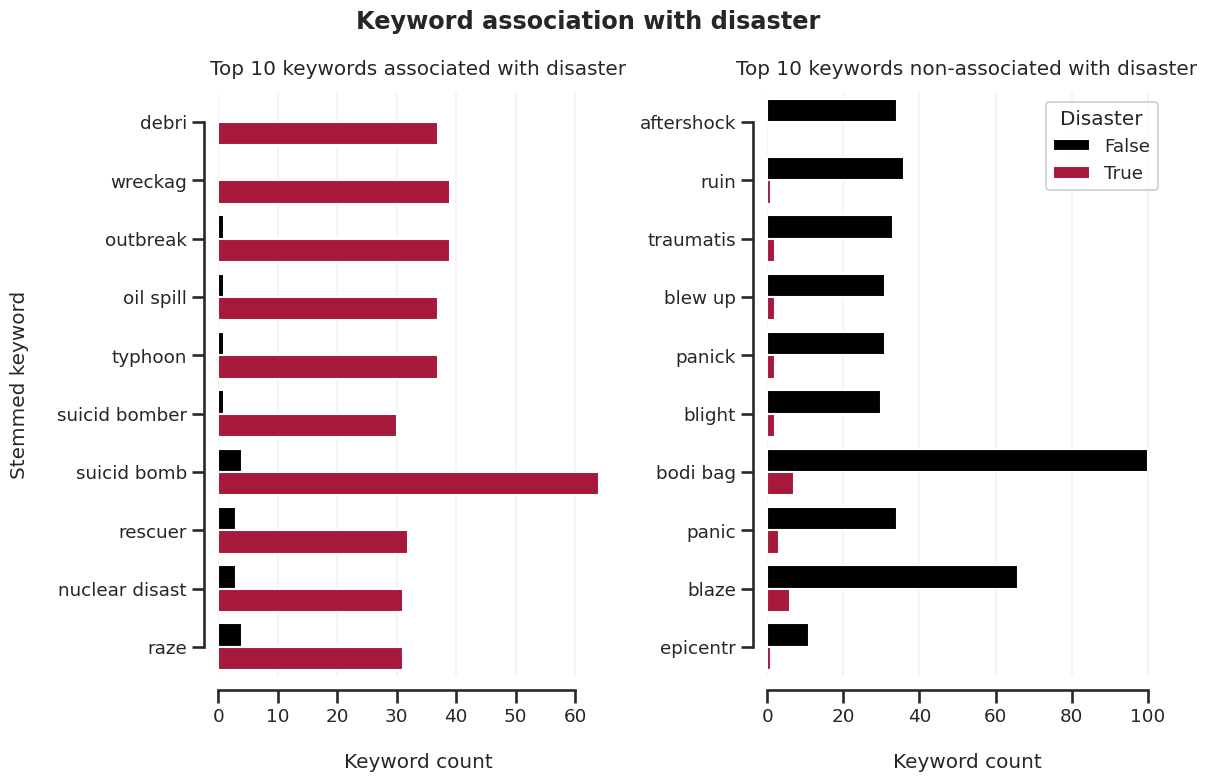

In [18]:
# Create the plot with two columns for side-by-side comparison
fig, axes = plt.subplots(ncols=2)

# Specify palette colors
palette = ['black','#be012e']

# Plot the top 10 disaster-related keywords
sns.barplot(
    data=df_top10_disaster, y='keyword_processed', x='count', hue='target',
    palette=palette, order=top10_words_disaster, ax=axes[0], hue_order=[0, 1]
)

# Plot the top 10 non-disaster-related keywords
sns.barplot(
    data=df_top10_non_disaster, y='keyword_processed', x='count', hue='target',
    palette=palette, order=top10_words_non_disaster, ax=axes[1], hue_order=[0, 1]
)

# Set the title for each subplot
axes[0].set_title('Top 10 keywords associated with disaster', y=0.96)
axes[1].set_title('Top 10 keywords non-associated with disaster', y=0.96)

# Add a y-axis label only for the first plot
axes[0].set_ylabel('Stemmed keyword')
axes[1].set_ylabel(None)

# Set the x-axis label for both plots (count of keywords)
for ax in axes:
    ax.set_xlabel('Keyword count')

# Disable the legend on the first plot and create it for the second
axes[0].legend([], frameon=False)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['False', 'True'], title='Disaster', frameon=True)

# Add a bold main title for the entire plot
plt.suptitle('Keyword association with disaster', weight='bold')

# Remove the spines for a cleaner look and adjust layout spacing
sns.despine(trim=True, offset=10)
plt.tight_layout()

# Save the figure to file
plt.savefig('reports/figures/keyword_proportions.png', bbox_inches='tight', dpi=300)

# Show the plot on the screen
plt.show()

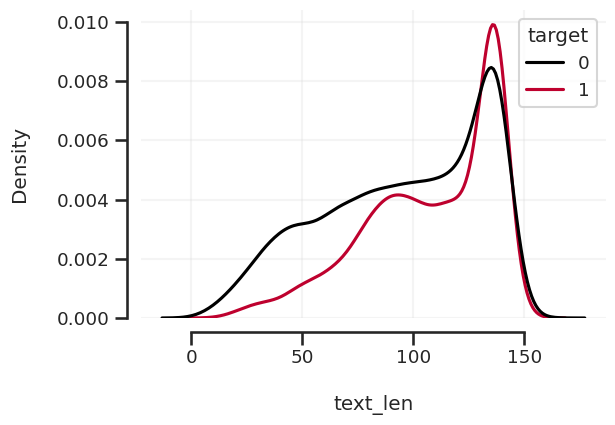

In [19]:
# Text lenght vs target

plt.figure(figsize=(6,4))

df_tmp = (
    df_train
    .assign(text_len = lambda x: x.text.map(len))
)

sns.kdeplot(data=df_tmp, x='text_len', hue='target', palette=palette)
sns.despine(trim=True, offset=10);

# Final considerations